In [ ]:
**[Click here to skip ahead to the Ownership stuff!](#Ownership)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # hack---doing this sets the pandas plots to use seaborn styles!

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
%ls

Untitled.ipynb                          most_enumerate_private_landowners.p
both-tabs-and-commas-screencap.png      nyc_building_nonsales.csv
data-munging.ipynb                      nyc_building_sales.csv
data-scribbles.ipynb                    nyc_pluto.csv
data-visualization.ipynb                rolling-sales-data-excel-screencap.png
largest_private_landowners.p            wealthiest_private_landowners.p


*The local PLUTO file that I have and that is used for most of this analysis is the 2015v1 file. I used the 2015v1 file, released recently, to structure the combined buildings data, but forgot to replace the 2015v1 file with the new file. In order to remedy that I need to rerun `data-munging.ipynb`.*

*What makes this tough is the fact that Trinity Church holdings dissappeared completely from the 2016 dataset. Whatever else that deal they signed with the Norwegian Wealth Fund did, it seems to have also relisted all of their propreties. Since I can't figure out what their propreties are in the first place, I can't compute a remapping.*

In [5]:
pluto = pd.read_csv('nyc_pluto.csv', index_col=0)

/Users/Honors/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (16,17,19,20,21,22,28,63,64,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
pluto.head(5)

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
0,Manhattan,1.0,10.0,101.0,5.0,1018.0,2.0,1.0,10004.0,E007,1.0,8100.0,1 GOVERNORS ISLAND,R3-2,NaN,NaN,NaN,NaN,NaN,GI,NaN,NaN,R3-2/GI,NaN,N,Y4,8.0,0,P,GOVERNORS ISLAND CORP,7736692.0,2725731.0,2725731.0,0.0,0.0,0.0,0.0,0.0,0.0,2725731.0,7.0,183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,N,5.0,5.0,104445450.0,151952400.0,104445450.0,151952400.0,1900.0,E,0.0,0.0,Governors Island,NaN,0.35,0.6,0.0,1.0,1.0,1.000010e+09,0.0,5.0,979071.0,190225.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1.0,15v1
1,Manhattan,1.0,101.0,101.0,1.0,1001.0,2.0,1.0,10004.0,E007,1.0,8200.0,1 LIBERTY ISLAND,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3-2,NaN,N,P7,8.0,0,X,U S GOVT LAND & BLDGS,541886.0,541886.0,541886.0,0.0,0.0,0.0,0.0,0.0,0.0,541886.0,7.0,10.0,0.0,0.0,0.0,500.0,1046.0,0.0,0.0,NaN,0.0,Y,5.0,5.0,4225950.0,11523150.0,4225950.0,11523150.0,1900.0,E,0.0,0.0,NaN,STATUE OF LIBERTY NATIONAL MONUMENT,1.00,0.6,0.0,1.0,1.0,1.000010e+09,0.0,1.0,971677.0,190636.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1.0,15v1
2,Manhattan,1.0,201.0,101.0,1.0,1000.0,2.0,1.0,10004.0,E007,1.0,8200.0,1 ELLIS ISLAND,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3-2,NaN,N,Z9,NaN,0,X,U S GOVT LAND & BLDGS,2764190.0,603130.0,603130.0,0.0,0.0,0.0,0.0,0.0,0.0,603130.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,N,5.0,5.0,14972400.0,105291900.0,14972400.0,105291900.0,1900.0,E,0.0,0.0,Ellis Island,NaN,0.22,0.6,0.0,1.0,1.0,1.000010e+09,0.0,1.0,972790.0,193648.0,12b,NaN,199 999,10101.0,NaN,0.0,NaN,1.0,15v1
3,Manhattan,1.0,301.0,101.0,NaN,NaN,2.0,1.0,10004.0,E007,1.0,NaN,JOE DIMAGGIO HIGHWAY,ZNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZNA,NaN,N,U0,7.0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,N,0.0,5.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.00,0.0,0.0,0.0,1.0,1.000010e+09,0.0,0.0,NaN,NaN,12b,NaN,199 999,10101.0,NaN,0.0,NaN,4.0,15v1
4,Manhattan,1.0,401.0,101.0,NaN,NaN,2.0,1.0,10004.0,E007,1.0,NaN,JOE DIMAGGIO HIGHWAY,ZNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZNA,NaN,N,U0,7.0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,N,0.0,5.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.00,0.0,0.0,0.0,1.0,1.000010e+09,0.0,0.0,NaN,NaN,12b,NaN,1 99 999,10101.0,NaN,0.0,NaN,4.0,15v1


In [7]:
# Integrity check: this ought to evaluate to 1, as we expect 'Borough', 'Block', 'Lot' to be a unique key.
np.max(pluto.groupby(['Borough', 'Block', 'Lot']).count().values)

1

# Address Density

How many addresses are there in each borough?

In [8]:
pluto['Borough'].value_counts()

Queens           324630
Brooklyn         277748
Staten Island    123892
Bronx             89963
Manhattan         43231
Name: Borough, dtype: int64

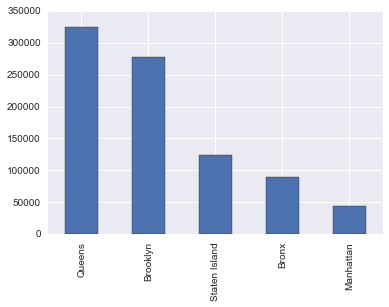

In [9]:
pluto['Borough'].value_counts().plot(kind='bar')

In [10]:
pluto['Borough'].value_counts()[['Queens', 'Brooklyn']].sum() / pluto['Borough'].value_counts().sum() 

0.700876360150047

Queens and Brooklyn dominate the rankings, with the two boroughs together composing over 70% of addresses in New York City. Manhattan by contrast provides just 5% of them. Staten Island and the Bronx split the remaining difference at just over and just under 12.5% each, respectively. In other words, for every 1 address in Manhattan, there are (approximately) 2 in the Bronx, 3 in Staten Island, 6 in Brooklyn, and 8 in Queens!

The scale of the difference between the number of residences in Manhattan and the number in the other boroughs is surprising, but to truly interpret this result we need to keep the sizes and populations of each borough in mind. Manhattan squeezes about two-thirds the population of Queens onto an island one-quarter the size, for example, a fact that defies easy classification.

A city block in Manhattan is wider than it is long, with each horizontal avenue measuring out approximately three diagonal streets in length <!--(ever been to [6 1/2 Avenue](https://en.wikipedia.org/wiki/6%C2%BD_Avenue)?)-->. [Using a figure given by *The New York Times* in 2006](http://www.nytimes.com/2006/09/17/nyregion/thecity/17fyi.html?_r=0) (if you like this sort of thing&mdash;I know I do&mdash;also check out [the breakdown given in the 1892 World Almanac](http://stuffnobodycaresabout.com/2012/11/19/all-new-york-city-streets-are-not-created-equal/)), this makes for ~140 streets per square mile. By summing up the total lot areas and filtering out parks and greenspaces we can measure the average number of properties per city block:

In [11]:
# pluto[pluto['Address'] == 'BODY OF WATER'] # srs?

In [12]:
non_park_pluto = pluto[(pluto['Address'].notnull()) & 
                  (pluto['ZoneDist1'] != 'PARK') &
                  (pluto['ZoneDist1'] != 'PARKNYS') &
                  (pluto['ZoneDist1'] != 'PARKUS') &
                  (pluto['ZoneDist1'] != 'ZNA')
                 ]

In [13]:
# According to Wikipedia the areas are 42, 71, 23, 109, and 58 square miles, respectively.
# However we are going by total lot area for actual building lots, which will be significantly less.
# A further correction, we will remove lots without addresses and parks from consideration.
lot_areas = non_park_pluto.groupby(['Borough'])['LotArea'].sum().map(lambda x: x / 27878400)
lot_areas

Borough
Bronx            23.690541
Brooklyn         41.150186
Manhattan        13.057614
Queens           70.506433
Staten Island    36.936558
Name: LotArea, dtype: float64

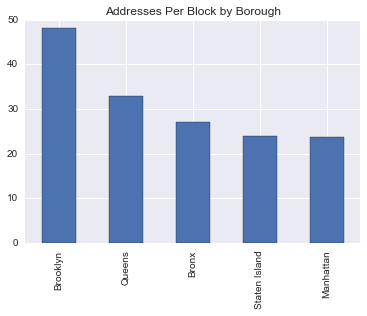

In [14]:
# boroughs = pd.DataFrame({'borough': ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'],
#                          'population': [1636268, 1438159, 2621793, 2321580, 473279],
#                          'area': [23, 42, 71, 109, 58]}).set_index('borough')

# NEED TO ANNOTATE THESE LATER:
# http://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
# DO IT!

boroughs = pd.DataFrame({'population': [1636268, 1438159, 2621793, 2321580, 473279],
                         'area': lot_areas},
                         index=lot_areas.index)

address_data = (pluto['Borough'].value_counts().sort_index() /
                boroughs['area'].sort_index()
                / 140).sort_values(ascending=False)
address_data.plot(kind='bar', title='Addresses Per Block by Borough')

Brooklyn is easily the densest of the boroughs, packing twice as many addresses per block as Manhattan, the land of skyscrapers.

Staten Island is comparably dense with Manhattan. Staten Island is the most suburban of the five boroughs, so lots there are larger as a natural consequence of its lower population density and cooler real estate market.

The Bronx by contrast, as a consequence of its late development relative to the history of the other boroughs, is the most consolidated of the outer boroughs, netting it a disproportionate share of the city's apartment complexes and [project housing](https://en.wikipedia.org/wiki/List_of_New_York_City_Housing_Authority_properties).

These facts becomes easy to see if we swap to measuring density by number of persons per address.

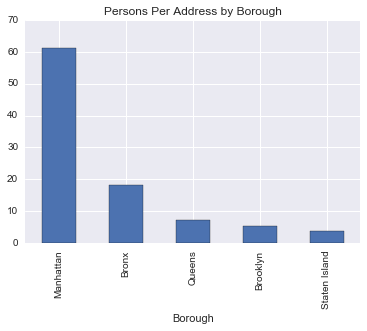

In [15]:
# NEEDS LABELS! See the earlier note.
person_data = (boroughs['population'].sort_index() /
               non_park_pluto['Borough'].value_counts().sort_index()).sort_values(ascending=False)
person_data.plot(kind='bar', title='Persons Per Address by Borough')

Manhattan absolutely crushes this ranking, packing fifteen times as many people per address (approximately 61) as Staten Island does (approximately 4)!

As per our discussion before, the Bronx (approximately 18 residents per addresss) is two-and-a-half as dense per address as runner-up Queens is (approximately 7 residents per address).

Queens fits somewhat fewer people (2.3 versus 2.6 million) onto a significantly greater area (109 versus 71 square miles), yet&mdash;as a consequence of having such a smaller lot size&mdash;Brooklyn nevertheless has significantly fewer people per building (approximately 5 residents per address).

If we mix these two metrics up we can compute the average number of people per block for each of the boroughs.

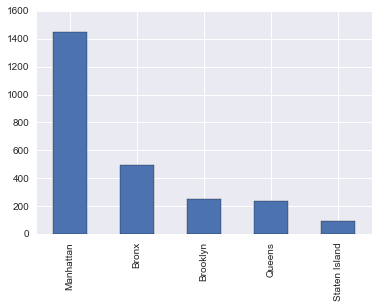

In [16]:
# NEEDS LABELS! See the earlier note.
(person_data * address_data).sort_values(ascending=False).plot(kind='bar')

Though Brooklyn and Queens again swap places, the overall picture is about the same.

So far we've stuck to computations by borough, but let's try to aggregate the data on a more local level. The definition of a neighborhood is a slippery one&mdash;where does Little Italy end and Chinatown begin?&mdash;so a discrete boundary&mdash;like, say, [ZIP codes](http://nyc.pediacities.com/New_York_City_ZIP_Codes)&mdash;is more appropriate.

In [17]:
import folium

def display_neighborhoods():
    neighborhood_map = folium.Map(location=[40.7831, -73.9712], zoom_start=11)
    neighborhood_map.geo_json(geo_path='nyc_neighborhoods.geojson')
    # ESRI shapefile the city put together for some maps it did.
    return neighborhood_map

display_neighborhoods()

In [18]:
(person_data * address_data)

Bronx             496.585965
Brooklyn          250.335323
Manhattan        1445.423604
Queens            235.968476
Staten Island      92.834084
dtype: float64

It's a pointfile, not a shapefile! Argh! Will need to cast around for a solution.

## Address Characteristics

What would *you* do with a record of every address in New York City?

To start with, let's take a look at addresses by character length. Not every property in New York City has an address: parks don't, for instance, nor do many empty lots, though others get assigned the name of the nearest largest street. There are also a handful of "other options" in the dataset as well: for instance there are several entities addressed as `BODY OF WATER`, and at least one, I kid you not, `CLIFF` (missing coordinate data too&mdash;natch).

Let's assume that a valid address is of the form `120 COURT STREET`, that is, an address number followed by at least two strings seperate strings for the street. There's one important exception to this rule&mdash;Manhattan piers are simply a pier and a number, e.g. `PIER 19`. We'll include those, too.

In [19]:
def map_address_length(address):
    if len(address.split(' ')) >= 3 or 'PIER' in address and len(set.intersection({str(n) for n in range(1, 10)}, set(address))) > 0:
            return int(len(address.replace(' ', '')))
    else:
        return None

In [20]:
map_address_length('PIER 12'), map_address_length('2 COURT STREET'), map_address_length('2 COURT')

(6, 12, None)

In [21]:
address_lengths = pluto[pluto['Address'].notnull()]['Address'].map(map_address_length)

In [22]:
# PIER 9 is a defunct restaurant address which is the sole 5-lengther, so let's remove it.
address_lengths = address_lengths[address_lengths >= 6]

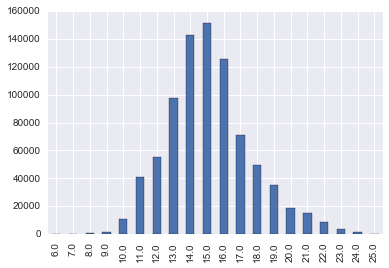

In [23]:
address_lengths.value_counts().sort_index().plot(kind='bar')

In [24]:
address_lengths.value_counts()[[14, 15, 16]].sum() / address_lengths.value_counts().sum()

0.5049802413358228

In [25]:
address_lengths.value_counts()[range(5, 14)].sum(), address_lengths.value_counts()[range(17, 25)].sum()

(207237.0, 204346)

In [26]:
address_lengths.describe()

count    831787.000000
mean         15.138811
std           2.522231
min           6.000000
25%          14.000000
50%          15.000000
75%          16.000000
max          25.000000
Name: Address, dtype: float64

In [27]:
# pluto.iloc[address_lengths[address_lengths == 5].index]

In [28]:
pluto.iloc[address_lengths[address_lengths == 25].index].sample(5)

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
731937,Queens,12866.0,8.0,413.0,616.02,1001.0,29.0,31.0,11422.0,E314,105.0,3531.0,121-47 BROOKVILLE BOULEVARD,R2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R2,NaN,N,A2,1.0,0,NaN,LOUISE C KING,5130.0,1302.0,0.0,1302.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,1.5,1.0,1.0,97.17,75.0,31.0,24.67,G,1.0,Y,3.0,2.0,10960.0,23223.0,1610.0,1610.0,1950.0,E,0.0,0.0,NaN,NaN,0.25,0.5,0.0,1.0,4.0,4.128660e+09,0.0,61602.0,1060033.0,187816.0,19c,NaN,414 061,45405.0,NaN,0.0,NaN,1.0,15v1
740608,Queens,13262.0,23.0,413.0,638.00,2012.0,29.0,31.0,11422.0,E314,105.0,3531.0,138-64 BROOKVILLE BOULEVARD,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3-2,NaN,N,A2,1.0,0,NaN,CASSANDRA M. JOHNSON,4326.0,1480.0,0.0,1480.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,1.5,1.0,1.0,42.00,103.0,24.0,30.00,G,1.0,N,5.0,2.0,8568.0,24134.0,1610.0,1610.0,1950.0,E,0.0,0.0,NaN,NaN,0.34,0.6,0.0,1.0,4.0,4.132620e+09,0.0,638.0,1056880.0,182455.0,19b,NaN,414 106,45505.0,NaN,0.0,NaN,1.0,15v1
732238,Queens,12886.0,38.0,413.0,616.02,1003.0,29.0,31.0,11422.0,E314,105.0,3531.0,128-35 BROOKVILLE BOULEVARD,R2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R2,NaN,N,A1,1.0,0,P,"RAGBEER, RENITA",14354.0,1304.0,0.0,1304.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,2.0,1.0,1.0,60.00,269.0,21.0,24.00,G,1.0,Y,5.0,2.0,15450.0,25416.0,0.0,0.0,1935.0,E,0.0,0.0,NaN,NaN,0.09,0.5,0.0,1.0,4.0,4.128860e+09,0.0,61602.0,1059908.0,187351.0,19c,NaN,414 061,45405.0,NaN,0.0,NaN,1.0,15v1
733277,Queens,12917.0,287.0,413.0,616.02,1004.0,29.0,31.0,11422.0,E314,105.0,3531.0,130-05 BROOKVILLE BOULEVARD,R2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R2,NaN,N,A1,1.0,0,NaN,HORNE JOHNNIE C,3003.0,1728.0,0.0,1728.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,2.0,1.0,1.0,14.00,91.0,35.0,20.00,G,1.0,Y,3.0,2.0,6480.0,22980.0,1610.0,1610.0,1960.0,E,0.0,0.0,NaN,NaN,0.58,0.5,0.0,1.0,4.0,4.129170e+09,0.0,61602.0,1059358.0,186474.0,19c,NaN,414 063,45405.0,NaN,0.0,NaN,1.0,15v1
732281,Queens,12889.0,14.0,413.0,616.02,1003.0,29.0,31.0,11422.0,E314,105.0,3531.0,129-17 BROOKVILLE BOULEVARD,R2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R2,NaN,N,A1,1.0,0,NaN,BLUE KWAJALIEN L,3315.0,1640.0,0.0,1640.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,2.0,1.0,1.0,51.00,65.0,29.0,32.00,G,1.0,N,5.0,2.0,8697.0,18637.0,1610.0,1610.0,1925.0,E,0.0,0.0,NaN,NaN,0.49,0.5,0.0,1.0,4.0,4.128890e+09,0.0,61602.0,1059551.0,186804.0,19c,NaN,414 062,45405.0,NaN,0.0,NaN,1.0,15v1


It seems that address lengths (excluding spaces) are approximately normally distributed in New York City, and surprisingly tightly so: **half of the addresses in New York City come in at 14, 15, or 16 characters long**.

Non-mean address lengths distribute approximately evenly into either tail, but the right tail is slightly thinner and longer&mdash;e.g. "long" addresses tend to be especially long, whilst "short" addresses tend to be only somewhat shorter than average.

There is no single shortest address in New York City: there are a number of two-number piers, e.g. `PIER 40`, `PIER 52`, etc. Following up on these, there are a sizable number of short place-names, such as `74 6 ROAD` in Queens or `5 3 PLACE` in Brooklyn, which seem to occur mostly in these two boroughs.

There is also no single longest address: there are over a hundred addresses in Queens on Woodhaven Boulevard with names like `103-29A WOODHAVEN BOULEVARD` which take the prize for longest in the city.

The following GIF plays it all out.

*Animated GIF of the addresses by character count.*

Let's tokenize address endings to see which words are most common.

In [29]:
['23', 'Van', 'Houston', 'Street'][1:-1]

['Van', 'Houston']

In [30]:
from collections import Counter
from tqdm import tqdm

end_address_tokens = Counter()

# We split and take [-1:] to remove the address non-ending from consideration.
for words in tqdm([address.split(' ')[-1:] for address in tqdm(pluto[pluto['Address'].notnull()]['Address'].values)]):
    end_address_tokens.update(words)

In [31]:
def is_number(element):
    try:
        float(element)
    except ValueError:
        return False
    return True

In [32]:
# Chart is not that helpful...
# pd.Series({token[0]: token[1] for token in address_tokens.most_common(200) if not is_number(token[0])}).sort_values(ascending=False).plot(kind='bar', figsize=(30, 12))

In [33]:
from prettypandas import PrettyPandas

In [34]:
# This is the full table, paste this to Gist!
top_endings = pd.DataFrame.from_records([token for token in end_address_tokens.most_common(400) if not is_number(token[0]) and len(token[0]) > 1],
                                        columns=['Token', 'Occurances'])
top_endings.index = top_endings.index + 1
top_endings.index.name = 'Rank'
# Make an effort to merge certain extremely common abbreviations.
# top_100.iloc[0, 1] = top_100.iloc[0, 1] + top_100.iloc[14, 1] # St -> Street
# top_100.iloc[6, 1] = top_100.iloc[6, 1] + top_100.iloc[13, 1] # Blvd > Boulevard
# top_100 = top_100.drop([14, 15])

top_endings['Token'] = top_endings['Token'].map(str.title)
top_endings = top_endings.sort_values(by='Occurances', ascending=False)
top_endings = top_endings.reindex()
PrettyPandas(top_endings)

In [35]:
# This goes in the article.
PrettyPandas(top_endings[:20])

In [36]:
top_endings[:2]['Occurances'].sum() / top_endings['Occurances'].sum()

0.8223563840600608

In [37]:
top_endings[:20]['Occurances'].sum() / top_endings['Occurances'].sum()

0.9924120291794117

Place-name endings have very little variety, with **82% of the addresses in New York City ending in either "Street" or "Avenue"**. **The top 20 most common tokens cover over 99% of addresses in New York City**!

Broadway appears on this list because of its almost unique habit of naming addresses all on its own: whilst a building on another avenue would be `123 3rd Avenue`, when they are on Broadway they are more usually, *but not always*, simply `123 Broadway`. Combined with the fact that [the Broadway is the longest street in New York City](https://en.wikipedia.org/wiki/Broadway_%28Manhattan%29) (and the only one I'm aware of which crosses two boroughs), **Broadway is easily the most heavily addressed street in New York City**.

Where do the rest of the streets in NYC fall?

In [38]:
filtered_pluto = pluto[pluto['Address'].notnull()][['Borough', 'Address']]
# There are a lot of junk results for empty lots which don't have a specified lot number but whatever.
# Those entries we can simply filter out by hand, given the scope of the analysis.
filtered_pluto['Street'] = filtered_pluto['Address'].map(lambda a: ' '.join(a.split(' ')[1:]))

In [39]:
street_tokens = Counter()

for borough, street in zip(filtered_pluto['Borough'].values, filtered_pluto['Street'].values):
    if street not in ['AVENUE', 'STREET', 'ROAD']:
        street_tokens.update([(borough, street.title())])

In [40]:
n = 500
boroughs = [count[0][0] for count in street_tokens.most_common(n)]
streets = [count[0][1] for count in street_tokens.most_common(n)]
counts = [count[1] for count in street_tokens.most_common(n)]

address_counts = pd.DataFrame({'Borough': boroughs, 'Street': streets, 'Count': counts})
address_counts.index += 1
address_counts.index.name = 'Rank'

In [41]:
address_counts[address_counts['Borough'] == 'Manhattan']

,Borough,Count,Street
Rank,,,
26,Manhattan,996,Broadway
88,Manhattan,845,2 Avenue
218,Manhattan,687,3 Avenue
274,Manhattan,638,1 Avenue
349,Manhattan,563,Amsterdam Avenue
370,Manhattan,547,Lexington Avenue
389,Manhattan,528,5 Avenue
410,Manhattan,500,Madison Avenue


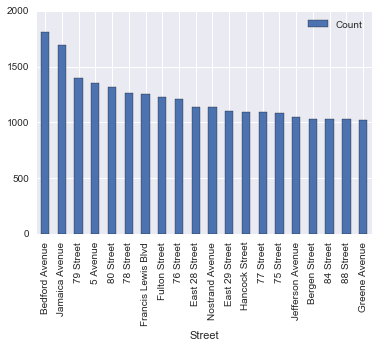

In [42]:
def colorize(borough):
    if borough == 'Brooklyn':
        return 'b'
    elif borough == 'Queens':
        return 'r'

# address_counts[:20].plot.bar(x='Street', y='Count', color=address_counts[:20]['Borough'].map(colorize))

# Need to figure out how to colorize this based on borough! Maybe use small multiples instead?
address_counts[:20].plot.bar(x='Street', y='Count')

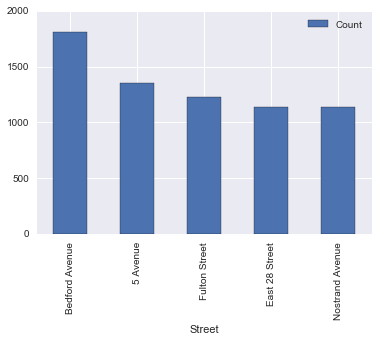

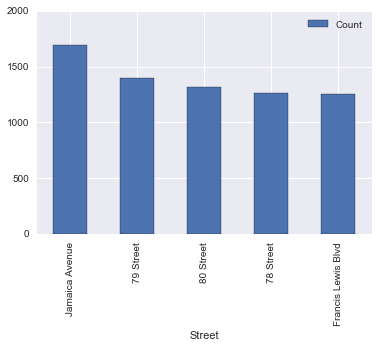

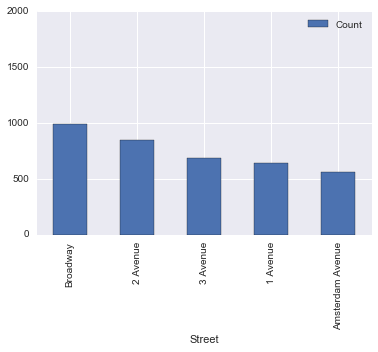

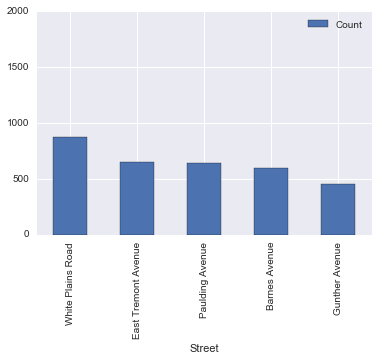

In [43]:
# Small multiples approach?
# Develop this into a matplotlib (2,2) subplot.
def bar_chart_it(df):
    return df.plot.bar(x='Street', y='Count', ylim=[0, 2000])

brooklyn = bar_chart_it(address_counts[address_counts['Borough'] == 'Brooklyn'][:5])
queens = bar_chart_it(address_counts[address_counts['Borough'] == 'Queens'][:5])
manhattan = bar_chart_it(address_counts[address_counts['Borough'] == 'Manhattan'][:5])
bronx = bar_chart_it(address_counts[address_counts['Borough'] == 'Bronx'][:5])

*Map this data out?*

Queens and Brooklyn dominate these rankings: [Bedford Avenue](https://en.wikipedia.org/wiki/Bedford_Avenue) in Brooklyn is number one while [Jamacia Avenue](https://en.wikipedia.org/wiki/Jamaica_Avenue) in Queens is number two. The highest ranking street in Staten Island is [Hylan Boulevard](https://en.wikipedia.org/wiki/Hylan_Boulevard), coming in at 21 with 1021 addresses. The highest-ranking street in the Bronx is 69th-place finisher [White Plans Road](https://en.wikipedia.org/wiki/White_Plains_Road), with 879 addresses. The highest-ranking street in Manhattan (*excluding* the Broadway) is 88th-place finisher [2nd Avenue](https://en.wikipedia.org/wiki/Second_Avenue_%28Manhattan%29), with 845 unique addresses.

Although the number of addresses is not exactly a precise measure of overall length, in the case of the leaders these streets do all appear to also be the longest in their boroughs.

If you're interested in Manhattan addressing&mdash;questions like where are the low numbers, where are the high numbers, and how are address numbers distributed throughout&mdash;Ben Wellington of IQuantNY published [an excellent analysis on the subject](http://iquantny.tumblr.com/post/102509139169/colorfully-decoding-manhattans-address-system) a few years ago which is worth reading. The conclusions there ought to extend to greater New York City, so I won't reiterate them myself&mdash;read it!

In [44]:
number_tokens = Counter()

for words in tqdm([address.split(' ')[:1] for address in tqdm(pluto[pluto['Address'].notnull()]['Address'].values)]):
    number_tokens.update(words)

In [45]:
# Not useful! This is probably an error: ought to be "150 123 Street" perhaps?

def is_number(n):
    try:
        int(n)
    except ValueError:
        return False
    return True

np.max([int(num) for num, value in number_tokens.items() if is_number(num)])

150123

One final surprise result: though both rank highly in usage, `West` is three times as popular in New York City addresses as `East` is. `North` and `South`, by contrast, are nowhere to be found.

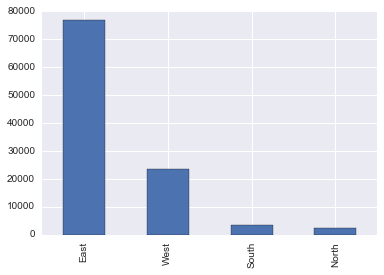

In [46]:
address_tokens = Counter()

for words in tqdm([address.split(' ') for address in tqdm(pluto[pluto['Address'].notnull()]['Address'].values)]):
    address_tokens.update(words)

pd.Series({token.title(): address_tokens[token] for token in ['NORTH', 'SOUTH', 'EAST', 'WEST']}).sort_values(ascending=False).plot(kind='bar')

## Ownership

Who owns the buildings in New York City? This is actually a very difficult question to answer. The Roman Catholic Church, for example, probably owns a formidable number of buildings in the city, but as they tend to be owned in name by individuals or sub-units of the church at large, precisely how much they own is hard to answer. There are also plenty of opaque development groups and investment vehicles around playing the real estate market shell game, making it all the more challenging to follow who owns what and further muddying the picture.

Still, the public record should be able to tell us some very interesting things. To start with, using the `PLUTO` dataset&mdash;a public archival record on everything that the city government knows about every building in New York City&mdash;who is the most enumerate landowner in New York City?

In [47]:
# PrettyPandas(pluto['OwnerName'].value_counts()[:10])

Somewhat obviously the single largest property-holder in New York City is New York City itself, with various agencies of the city government taking all but one of the top 10 and most of the top 50 slots. The one exception is the sixth biggest property-owner, `OWNER / AGENT`&mdash;a mildly questionable instance of indeterminate ownership in the public record. There is also an option for the 33 propreties in the city for whom an owner is apparently simply `UNKNOWN`.

However, the public record of public asset ownership is a little haphazard. For instance in additional to dedicated points for each of the individual city agenices there are several different variations on "the City of New York" (`CITY OF NEW YORK`, `THE CITY OF NEW YORK`, etc.), and a similar situation exists for federal and state agencies, which are listed either individually or as part of the `UNITED STATES GOVERNMENT` or even `THE PEOPLE OF THE STATE OF NEW YORK`. So to explore the raw data yourself, go here.

It's easier for us to examine private entity data. A [Q&A published in *The New York Times* in 1994](http://www.nytimes.com/1994/10/16/nyregion/fyi-531286.html) fingers Columbia Univesity, NYU, Trinity Church, and a handful of developers as the biggest in terms of private addresses held. What does the picture look like today? Filtering out public services, here is what the public record has to say about the 20 private owners with the largest number of buildings:

In [48]:
# pluto[(pluto['OwnerType'].isnull()) | (pluto['OwnerType'] == 'P')]['OwnerName'].value_counts()

*This has to be done by hand because the `OwnerType` field is horribly inaccurate!*

In [49]:
# pluto['OwnerName'].value_counts()[40:]

In [185]:
private_raw_names = ['TRUSTEES OF COLUMBIA',
                                      'DEUTSCHE BANK NATIONA',
                                      'NEHEMIAH HOUSING DEVE',
                                      'NORTHEASTERN CONFEREN',
                                      'U.S. BANK NATIONAL AS',
                                      'NEW YORK UNIVERSITY',
                                      'CONSOLIDATED EDISON C',
                                      'MAGUIRE AVENUE REALTY',
                                      'NEW YORK GARDEN TRUST',
                                      'GREATER NEW YORK CORP',
                                      'NYC PARTNERSHIP HOUSI',
                                      'ROMAN CATHOLIC CHURCH',
                                      'BAIANO DEVELOPMENT LL',
                                      'SILVERSHORE PROPERTIE',
                                      'YESHIVA UNIVERSITY',
                                      'CASA MASON CORP',
                                      'CLINTON GRAHAM', 
                                      'MG RICHMOND LLC',
                                      # 'RATI R PANCHAL', # Not present in 2016 data. Possibly a hoax. Ignore.
                                      'THE TRUSTEES OF COLUM',
                                      'HPENY HOUSING DEVELOP',
                                      'PROL PROPERTIES CORPO']
private_owners = pluto['OwnerName'].value_counts().ix[private_raw_names]
name_map = {'THE TRUSTEES OF COLUM': 'Trustees Of Columbia',
            'DEUTSCHE BANK NATIONA': 'Duestche Bank National Trust',
            'NEHEMIAH HOUSING DEVE': 'Spring Creek Nehemaih',
            'NORTHEASTERN CONFEREN': 'Northeastern Conference of Seventh-Day Adventists',
            'U.S. BANK NATIONAL AS': 'U.S. Bank National Association',
            'CONSOLIDATED EDISON C': 'Consolidated Edison Company',
            'GREATER NEW YORK CORP': 'Greater New York Conference of Seventh-day Adventists',
            'NYC PARTNERSHIP HOUSI': 'Housing Partnership Development Corporation',
            'BAIANO DEVELOPMENT LL': 'Baiano Development LLC',
            'SILVERSHORE PROPERTIE': 'Silvershore Properties',
            'CASA MASON CORP': 'Casa Mason Corporation',
            'HPENY HOUSING DEVELOP': 'Hpeny Housing Development Fund Company',
            'PROL PROPERTIES CORPO': 'Prol Properties Corporation',
            'MG RICHMOND LLC': 'Mg Richmond LLC'}

def map_name(name):
    if name in name_map.keys():
        return name_map[name]
    else:
        return name.title()

private_owners.index = [map_name(name) for name in private_owners.index]
private_owners = private_owners.groupby(private_owners.index).sum().sort_values(ascending=False)
private_owners.index.name = 'Owner'
private_owners.name = 'Addresses'
private_owners = pd.DataFrame({'Owner': private_owners.index, 'Addresses': private_owners.values}, index=list(range(1, 21)))
private_owners = private_owners[['Owner', 'Addresses']]
private_owners.index.name = 'Rank'
# private_owners['Rank'] = list(range(1, 21))

In [175]:
# # Taking the coordinates directly off of the file turned out to be too hard in the short term.
# # They are encoded in State Plane measure instead of coordinates, and I don't have time to research
# # the decoding process in Python for that.
# # Also a ****ton of their values are missing.
# # So I geocoded instead.

# from ast import literal_eval

# coord_srs = pd.Series()

# private_owners['Coordinates'] = np.nan

# for owner in private_raw_names:
#     ret = pluto[pluto['OwnerName'] == owner][['XCoord', 'YCoord']]
#     # print(ret.values)
#     # print(ret.fillna(0.0))
#     # break
#     coord_srs[map_name(owner)] = str(ret.fillna(0.0).values.tolist())
#     # private_owners_copy['Coordinates'] = coord_srs
#     # private_owners_copy[private_owners_copy['Owner'] == map_name(owner)]['Coordinates'] = str(ret.values.tolist())
#     # break
#     # literal_eval(str(ret.values.tolist()))
# coord_srs.index = range(1, len(private_owners) + 1)

from ast import literal_eval

coord_srs = pd.Series(index=private_owners.index)

private_owners['Coordinates'] = np.nan

for rank, owner in zip(range(1, len(private_owners) + 1), private_raw_names):
    addresses = pluto[pluto['OwnerName'] == owner][['Address']].fillna('None').values.tolist()
    
    # print(ret.values)
    # print(ret.fillna(0.0))
    # break
    coord_srs[rank] = str(ret.fillna(0.0).values.tolist())
    # private_owners_copy['Coordinates'] = coord_srs
    # private_owners_copy[private_owners_copy['Owner'] == map_name(owner)]['Coordinates'] = str(ret.values.tolist())
    # break
    # literal_eval(str(ret.values.tolist()))

In [189]:
from geopy.geocoders import GoogleV3

In [243]:
from tqdm import tqdm

In [258]:
payload = pd.Series(index=private_owners.index)
geolocator = GoogleV3(api_key='...') # Insert your own!

for rank, owner in tqdm(enumerate(private_raw_names)):
    addresses = pluto[pluto['OwnerName'] == owner]['Address'].fillna('None')
    dict_store = {}
    for address in addresses:
        dat = geolocator.geocode('{0}, NEW YORK'.format(address))
        dict_store[address] = [dat.latitude, dat.longitude]
    token = str(dict_store)
    payload[rank + 1] = token

private_owners['Places'] = payload

In [268]:
private_owners

,Owner,Addresses,Places
Rank,,,
1,Trustees Of Columbia,209,"{'424 WEST 119 STREET': [40.8083353, -73.95926..."
2,Duestche Bank National Trust,86,"{'46-57 189 STREET': [40.751233, -73.790279], ..."
3,Spring Creek Nehemaih,81,"{'751 VANDALIA AVENUE': [40.6574606, -73.86942..."
4,Northeastern Conference of Seventh-Day Adventists,79,"{'115-50 MERRICK BOULEVARD': [40.6884892, -73...."
5,New York University,77,"{'2383 HOFFMAN STREET': [40.855681, -73.889064..."
6,U.S. Bank National Association,77,"{'51 WASHINGTON SQUARE S': [40.7304028, -73.99..."
7,Consolidated Edison Company,74,"{'419 EAST 36 STREET': [40.7449439, -73.97135]..."
8,Maguire Avenue Realty,71,"{'15 SANTA MONICA LANE': [40.538236, -74.21239..."
9,New York Garden Trust,62,"{'328 FRANKLIN AVENUE': [40.687968, -73.957298..."


In [182]:
literal_eval(coord_srs[1])

[['52 WEST 85 STREET'],
 ['411 WEST 114 STREET'],
 ['402 WEST 115 STREET'],
 ['408 WEST 115 STREET'],
 ['410 WEST 115 STREET'],
 ['412 WEST 115 STREET'],
 ['1125 AMSTERDAM AVENUE'],
 ['419 WEST 115 STREET'],
 ['415 WEST 115 STREET'],
 ['411 WEST 115 STREET'],
 ['403 WEST 115 STREET'],
 ['404 WEST 116 STREET'],
 ['420 WEST 116 STREET'],
 ['424 WEST 116 STREET'],
 ['1129 AMSTERDAM AVENUE'],
 ['2820 BROADWAY'],
 ['2824 BROADWAY'],
 ['253 WEST 109 STREET'],
 ['518 WEST 111 STREET'],
 ['529 WEST 111 STREET'],
 ['522 WEST 112 STREET'],
 ['534 WEST 112 STREET'],
 ['540 WEST 112 STREET'],
 ['2874 BROADWAY'],
 ['2880 BROADWAY'],
 ['539 WEST 112 STREET'],
 ['535 WEST 112 STREET'],
 ['531 WEST 112 STREET'],
 ['523 WEST 112 STREET'],
 ['521 WEST 112 STREET'],
 ['511 WEST 112 STREET'],
 ['509 WEST 112 STREET'],
 ['502 WEST 113 STREET'],
 ['506 WEST 113 STREET'],
 ['WEST 113 STREET'],
 ['514 WEST 113 STREET'],
 ['526 WEST 113 STREET'],
 ['530 WEST 113 STREET'],
 ['536 WEST 113 STREET'],
 ['540 WEST 

In [186]:
PrettyPandas(private_owners[['Owner', 'Addresses']])

**Columbia University is the runaway winner with over 200 properties**&mdash;twice the number owned properties as the next largest private property-holder, the shady Duestche Bank National Trust (on which almost nothing can be found online, signs pointing to a foreclosure clearing house) and almost three times the 72 addresses allotted to the New York Public Library, for comparison. NYU and Yeshiva University both also make an appearance, though both quite a bit further down the list.

The rest are an very interesting blend of large utility companies, church groups, private brokerage firms, affordable housing corporations and non-profits, and, further down the line, private investors. 17th-most-enumerate real estate owner Clinton Graham, for instance, has a very interesting story, covered by WNYC, behind [his consolidation of properties in Jamacia, Queens](http://www.wnyc.org/story/79636-huge-rezoning-planned-for-jamaica-queens/), while the *Daily News* in 2012 wrote the Spring Creek Nehemaih housing development project up as [an affordable housing success story](http://www.nydailynews.com/life-style/real-estate/spring-creek-nehemiah-affordable-housing-success-story-east-new-york-article-1.1123089).

Still, the twice-over presence of Adventist organizations in the top twenty, with 140 units total, is a red flag. After all, the Roman Catholic Church owns but 58 properties in New York City in name&mdash;an impossible disparity in numbers for the largest church in the world in the largest city in the United States.

Why aren't there more, or indeed, almost any, large corporations on the listing? Because even though many companies call New York City their home, either or both in workforce and in headquarters, they own very little of the land they use. Companies strongly prefer renting or leasing their space instead. For example, Wells Fargo, a large commercial bank with hundreds of branches in New York City, owns just 42 of them, just short of the 43 needed to make this list.

In [52]:
ownership_counts = Counter(pluto['OwnerName'].value_counts().values)

In [53]:
ownership_counts[1] / len(pluto)

0.7878480075954316

In [54]:
# PrettyPandas(pluto['OwnerName'].value_counts()[:500])

In [55]:
141657811/106957002

1.3244370013288143

Still, if nothing else, the data points to a more heterogeneous ownership situation than I had expected. **Almost four-fifths of addresses in New York City are owned by organizations or individuals who own no other property**.

Here's a Gist with the top 500, if you're curious.

How does the picture change we look at square footage? That is, according to public record, who is the largest landowner in New York City?

This time let's first peek at the top ten:

In [56]:
ownership_footage = pluto.groupby(['OwnerName'])['BldgArea'].sum().sort_values(ascending=False)

In [57]:
PrettyPandas(ownership_footage[:11][[0,1,2,3,4,5,6,7,9,10]], precision=10)

Once again city government is a clear winner, with the New York City Housing Authority and the Department of Education being the only entities to own nine digits of square footage in New York City. Interestingly, using these rankings as a proxy for city services, this means that there is 30% more affordable housing than public school to the city.

`Owner / Agent` again ranks alarmingly far up the list, earning a promotion to technical fourth largest landowner.

If we combine "United States Of America" with all of the US Government sub-entities in the dataset&mdash;the National Park Service, USPS, etc.&mdash;it is probably the third largest landowner in the city. The National Park Service on its own is fourth largest.

Filtering down to private entities once more:

In [58]:
# ownership_footage[:60]

In [59]:
# pluto[pluto['OwnerName'] == '1-10 BUSH TERMINAL OW']

In [60]:
footage_ix = ['RIVERBAY CORPORATION',
              # 'THE CATHEDRAL CHURCH', # Error.
              'ST-DIL LLC',
              'STARRETT CITY, INC.',
              'ROCHDALE VILLAGE INC',
              'TRUSTEES OF COLUMBIA',
              'NEW YORK UNIVERSITY',
              'ST JOHN S UNIVERSITY',
              'RCPI HOLDCO LCC',
              'PRESBYTERIAN HSP CITY',
              'NORTH SHORE TOWERS AP',
              'TRINITY HUDSON HOLDIN', # Not present in the 2016 dataset used below.
              'PARKCHESTER SOUTH CON',
              'NEW WATER STREET CORP',
              'NEW YORK CONVENTION C',
              'THE TRUSTEES OF COLUM',
              'MOUNT SINAI HOSPITAL',
              '1-10 BUSH TERMINAL OW',
              'SL GREEN REALTY CORP.',
              'QUEENS FRESH MEADOWS',
              'PCV ST-DIL LLC',
              'FORDHAM UNIVERSITY',
              # 'AMALGAMATED WARBASSE',
              # 'ESRT EMPIRE STATE BUI',
              # '200 PARK, L.P.',
              # 'SOCIETY OF THE NY HOS'
             ]

l_name_map = {'NORTH SHORE TOWERS AP': 'North Shore Towers Apartments',
              'TRINITY HUDSON HOLDIN': 'Trinity Hudson Holdings',
              'PARKCHESTER SOUTH CON': 'Parkchester South Condominiums',
              'PRESBYTERIAN HSP CITY': 'New York-Presbyterian Hospital',
              'NEW WATER STREET CORP': 'New Water Street Corporation',
              'NEW YORK CONVENTION C': 'New York Convention Center Corporation',
              'THE TRUSTEES OF COLUM': 'Trustees Of Columbia',
              '1-10 BUSH TERMINAL OW': '1-10 Bush Terminal Owner LP',
              'SL GREEN REALTY CORP.': 'SL Green Realty Corporation',
              'AMALGAMATED WARBASSE': 'Amalgamated Warbasse Houses',
              'ESRT EMPIRE STATE BUI': 'Empire Station Building Realty Trust',
              'SOCIETY OF THE NY HOS': 'Society of the New York Hospital',
              'ST-DIL LLC': 'ST-DIL LLC',
              'RCPI HOLDCO LCC': 'RCPI Landmark Properties LLC',
              'PCV ST-DIL LLC': 'PCVST-DIL LLC',
              'ST JOHN S UNIVERSITY': 'St. John\'s University',
              # 'STARRETT CITY, INC.': 'Starrett City Incorporated'
             }


def map_area_name(name):
    if name in l_name_map.keys():
        return l_name_map[name]
    else:
        return name.title()


l_private_owners = ownership_footage[footage_ix]
l_private_owners.index = [map_area_name(f) for f in footage_ix]
l_private_owners.index.name = 'Owner'
l_private_owners.name = 'Sq. Footage'
l_private_owners = l_private_owners.groupby(l_private_owners.index).sum().sort_values(ascending=False)
l_private_owners = pd.DataFrame({'Owner': l_private_owners.index, 'Sq. Footage': l_private_owners.values}, index=list(range(1, 21)))
l_private_owners = l_private_owners[['Owner', 'Sq. Footage']]
l_private_owners.index.name = 'Rank'

In [61]:
PrettyPandas(l_private_owners, precision=10)

Riverbay Corporation, the largest private landowner in New York City, earns that title by virtue of its management of [Co-Op City](https://en.wikipedia.org/wiki/Co-op_City,_Bronx), easily the largest of the many private real estate development complexes on the list (so big, in fact, that were it its own municipality it would be the 10th largest city in the state!). The holding companies for [Stuyvesant Town and Peter Cooper Village](https://en.wikipedia.org/wiki/Stuyvesant_Town%E2%80%93Peter_Cooper_Village) (`St-Dil Llc` and `Pcv St-Dil Llc `, respectively) also appear on the list, as do a variety of other housing co-op companies.

While it's [NYU's grand expansion plans which are causing a stir in the city](http://ny.curbed.com/nyu-expansion), number-two landowner Columbia University&mdash;located after all in the much quieter environs of upper Manhattan&mdash;absolutely crushes Big Purple in total holdings. The compact Manhattanite Yeshiva University, meanwhile, loses its place in the top 20 by the sprawling outer-borough campuses of St. John and Fordham universities.

The holding companies for a few of the largest of local landmarks&mdash;[Rockefeller Center](https://en.wikipedia.org/wiki/Rockefeller_Center) (Rcpi Holdco Lcc) and [The Empire State Building](https://en.wikipedia.org/wiki/Empire State Building), for instance&mdash;also rank highly, as do a couple large hospital systems, Sl Green Realty Corporation, a commercial office space broker, and 1-10 Bush Terminal Owner Lp, some kind of Deleware-registered holding company on which I could find little information. Once again, *here* are the top 500, for the curious.

Of course, as discussed earlier, one landowner in contention for being the biggest of them all&mdash;the Catholic Church, which [*The Economist* thumbed in 2012 as "Manhattan's largest landowner"](http://www.economist.com/node/21560536)&mdash;is nowhere to be found. Given the recent talk about [the Catholic Church's declining influence in New York City](http://ny.curbed.com/2014/3/19/10132588/after-a-long-war-can-nyu-and-the-village-ever-make-peace) it seems likely that Riverbay and Co-Op City are easily the largest, with Columbia University an impressive but nevertheless distant second.

The government of the City of New York assesses, for tax purposes, the value of every building in New York City. Though these values are speculative and, as the city readily admits, are at best a cycle or two behind the current real estate market, they nevertheless provide a good baseline for estimating real estate holding values. Here are the leading public entities.

In [62]:
%ls

Untitled.ipynb                          most_enumerate_private_landowners.p
both-tabs-and-commas-screencap.png      nyc_building_nonsales.csv
data-munging.ipynb                      nyc_building_sales.csv
data-scribbles.ipynb                    nyc_pluto.csv
data-visualization.ipynb                rolling-sales-data-excel-screencap.png
largest_private_landowners.p            wealthiest_private_landowners.p


In [63]:
buildings = pd.concat([pd.read_csv('nyc_building_nonsales.csv'), pd.read_csv('nyc_building_sales.csv')])

/Users/Honors/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (22,23,25,26,27,28,69,70,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Honors/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (22,25,27,28,69,70,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [64]:
# buildings = pd.read_csv('nyc_buildings.csv')

In [65]:
v_property_owners = buildings.groupby('OwnerName')['NewFvT'].sum().sort_values(ascending=False)
# merge the Port Authority records.
v_property_owners['PORT AUTHORITY NY & N'] += v_property_owners['THE PORT AUTHORITY OF']
# Remove that and a bunch of other problems.
v_property_owners.drop(['THE PORT AUTHORITY OF',
                        'NYC DSBS', # The Department of Small Business Services, which somehow gets assigned LaGuardia.
                        'THE CITY OF NEW YORK', # It's all the City of New York!
                        'CITY OF NEW YORK' # Lol.
                       ], inplace=True)
v_property_owners.name = 'Total Value'

In [66]:
PrettyPandas(v_property_owners[:10], precision=10).as_currency(subset='Total Value')

According to city government records, the richest landowner in the city is the New York City Department of Education&mdash;logical enough, it's the largest school system in the country. The Port Authority of New York and New Jersey follows closly, which seems strange: are bridges and tunnels really worth all that much? That is, until you realize that 99.99% of this valuation consists of just two properties: `154-68 BROOKVILLE BOULEVARD` in Queens, better known as [John F. Kennedy International Airport](https://en.wikipedia.org/wiki/John_F._Kennedy_International_Airport), worth 15 billion (ever try to sell an airport? me neither!); and `185 GREENWICH STREET` in Manhattan, better known as [One World Trade Center](https://en.wikipedia.org/wiki/One_World_Trade_Center), worth 1.15 billion. Well, after hideous cost overruns, One World Trade Center famously cost 3.9 billion to build, so that fact alone is sobering (and let's not even talk about [the monstosity right next door...](https://en.wikipedia.org/wiki/World_Trade_Center_%28PATH_station%29#Cost_and_delays)).

Once again, *here* is a link to the raw top 500.

*Mention earlier version having RATI in it.*

The only religious institution present in any of the lists so far is the historical [Trinity Church](https://en.wikipedia.org/wiki/Trinity_Church_%28Manhattan%29)&mdash;more specifically, its real estate holding company, Trinity Hudson Holdings, which was revealed in 2013 to be worth [over 2 billion dollars](http://www.nytimes.com/2013/04/25/nyregion/trinity-church-in-manhattan-is-split-on-how-to-spend-its-wealth.html?_r=0), the legacy of a substantial gift by the Queen of England dating from the pre-Revolutionary era.

Trinity Church is considered to be in the running for wealthiest private landowner in New York City; [other contenders](http://ny.curbed.com/2014/3/19/10132588/after-a-long-war-can-nyu-and-the-village-ever-make-peace), as we have seen so far, are NYU, Columbia, and the Catholic Church. What does the public record have to say on this matter? Can we somehow pick a winner?

<!-- And who the hell is `RATI R PANCHAL`? A sizable nevertheless otherwise unimpressive landlord in Queens and Manhattan whose net worth is again 99.99% a function of a single address, `83-00 23 AVENUE` in Queens, better known as [LaGuardia Airport](https://en.wikipedia.org/wiki/LaGuardia_Airport), worth 6 billion (and, um, *totally* owned by the city). -->

In [67]:
# v_property_owners[:500]

In [68]:
# v_property_owners[0:50]

In [74]:
v_private = v_property_owners[:100][[
        'NEW YORK UNIVERSITY',
        'RCPI HOLDCO LCC',
        'ONE BRYANT PARK',
        '767 FIFTH PARTNERS LL',
        'NEW YORK CONVENTION C',
        'BPP ST OWNER LLC',
        'CITIFIELD',
        'SL GREEN REALTY CORP.',
        'ARENA NOMINEE SUB B,',
        '200 PARK, L.P.',
        'TRUSTEES OF COLUMBIA',
        '1345 LEASEHOLD LLC',
        # 'TRINITY HUDSON HOLDIN', # Was once here, with ~1.02 billion in assets held.
        'MOUNT SINAI HOSPITAL',
        'HMC TIMES SQUARE HOTE',
        'PGREF I 1633 BROADWAY',
        '1221 AVENUE HOLDINGS',
        'BOP 245 PARK LLC',
        'SOLOVIEFF REALTY CO.',
        'PRESBYTERIAN HSP CITY',
        # '345 PARK AVENUE, L.P.',
        # 'MSG ARENA, LLC',
        # Cutoff at 20 values.
#         'ONE CITY BLOCK LLC',
#         '555 1290 HOLDINGS, LL',
#         '1211 6TH AVENUE SYNDI',
#         'RIVERBAY CORPORATION',
#         'KORPENN LLC',
#         'ESRT EMPIRE STATE BUI',
#         '1515 BROADWAY OWNER L',
#         'FORDHAM UNIVERSITY',
#         'FSP 787 SEVENTH, LLC',
#         'ROCKEFELLER CTR NORTH'
    ]]

v_name_map = {
    '767 FIFTH PARTNERS LL':  '767 Fifth Partnerns LLC',
    'RCPI HOLDCO LCC': ' RCPI Landmark Properties LLC',
    'NEW YORK CONVENTION C': 'Nnew York Convention Center Corporation',
    'SL GREEN REALTY CORP.': 'SL Green Realty Corporation',
    'ARENA NOMINEE SUB B,': 'Arena Nominee Sub B, LLC',
    'HMC TIMES SQUARE HOTE': 'HMC Times Square Hotel LP',
    'PRESBYTERIAN HSP CITY': 'New York-Presbyterian Hospital',
    '1211 6TH AVENUE SYNDI': '1211 6th Avenue Syndicate',
    'ESRT EMPIRE STATE BUI': 'Empire State Realty Trust',
    '1515 BROADWAY OWNER L': '1515 Broadway Owner LLC',
    'ROCKEFELLER CTR NORTH': 'Rockefeller Center North',
    'BPP ST OWNER LLC': 'BPP ST Owner LLC',
    '1345 LEASEHOLD LLC': '1345 Leasehold LLC',
    'PGREF I 1633 BROADWAY': 'PGREF I 1633 Broadway Tower, L.P.',
    'SOLOVIEFF REALTY CO.': 'Solovieff Realty Company',
    'PRESBYTERIAN HSP CITY': 'New York-Presbyterian Hospital',
    'BOP 245 PARK LLC': 'Bop 245 Park LLC'
}

def v_rename(n):
    if n in v_name_map.keys():
        return v_name_map[n]
    else:
        return n.title()
    
v_private.index = v_private.index.map(v_rename)
v_private['Trinity Hudson Holdings'] = 1020000000 # Based on last year's data.
v_private = v_private.sort_values(ascending=False)
v_private.index.name = 'Owner'
# v_private_owners = v_private.groupby(l_private_owners.index).sum().sort_values(ascending=False)
v_private_owners = pd.DataFrame({'Owner': v_private.index, 'Total Value': v_private.values}, index=list(range(1, 21)))
v_private_owners = v_private_owners[['Owner', 'Total Value']]
v_private_owners.index.name = 'Rank'

In [75]:
PrettyPandas(v_private_owners, precision=10).as_currency(subset='Total Value')

<!-- Sadly in the most recent version of PLUTO Trinity Church's holdings are not easily discernable from the public record alone: after a recently declared partnership with the Norwegian Sovereign Wealth Fund ownership of the properties appears to have shifted away from a single isolatable entity. Nevertheless they *were* present in last year's records&mdash;the partnership was announced in late 2015. From those records the city's valuation for the church's holding company, `TRINITY HUDSON HOLDING`, stands at 1.02 billion dollars: a lot, certainly, but well short of the 2 billion figure cited in its reports a few years ago, and well short of the 2.26 billion dollars worth of real estate owned by New York University. -->

**According to the public record, NYU is the wealthiest private landowner in New York City.** Although Columbia University owns far more units and far more total land than NYU, it does so in a quiet upper Manhattan location, while NYU's position in Washington Square Park puts it into one of the most expensive real estate markets in the city, and thereof, the world. Trinity Church's holding company, `TRINITY HUDSON HOLDING`, weighs in at 1.02 billion dollars: a lot, certainly, but well short of the 2 billion figure cited in its reports a few years ago. And the Catholic Church remains a possible spoiler; there's just no way to be sure (hence why this is a matter of the *public* record).

Perhaps this lends credence to concerns, oft-cited amongst disenchanted students, that NYU is a real estate business in disguise.

Aside from that, given that almost four-fifths of landowners in New York City only own a single property, it doesn't come as a surprise that **owning a skyscraper in Manhattan is enough to make you one of the wealthiest real estate barons in New York City**. Most of the rest of this list consists of holding companies, some eponymous, some not, for various skyscrapers and skyscraper complexes in New York City.

Now serialize the data and throw coordinates into it.

In [269]:
# Serialize the data.
v_private_owners.to_pickle("wealthiest_private_landowners.p")
l_private_owners.to_pickle("largest_private_landowners.p")
private_owners.to_pickle("most_enumerate_private_landowners.p")

In [267]:
%ls

Untitled.ipynb                          most_enumerate_private_landowners.p
both-tabs-and-commas-screencap.png      nyc_building_nonsales.csv
data-munging.ipynb                      nyc_building_sales.csv
data-scribbles.ipynb                    nyc_pluto.csv
data-visualization.ipynb                rolling-sales-data-excel-screencap.png
largest_private_landowners.p            wealthiest_private_landowners.p


To retrieve for the Bokeh viz start with this:

    import pandas as pd
    from bokeh.models.sources import ColumnDataSource
    my_data = ColumnDataSource(data=pd.read_pickle('filename.p'))

This is very simple. However, since we also store coordindate data, each DataFrame record has to somehow fit a list of lists (the list of x-coordinate, y-coordinate pairs for locations in the city). `pandas` (like `sql` etc.) does not natively allow such multidimensional storage, the idea being that a `Series` record should be your smallest unit. I don't have the time to re-engineer everything, so instead I just converted the list to a string and stored that. It can then be retrieved using a nice Python standard lib function. For example, the following bit of code retrieves the place addresses and coordinates for the first item on the list.

    from ast import literal_value
    my_first_place_addresses_and_coordinates = literal_eval(my_data.data['Places'][0])
    my_second_place_addresses_and_coordinates = literal_eval(my_data.data['Places'][1])
    ...

These operations produce a `dict` shaped like so: `{'ADDRESS': [LATITUDE, LONGITUDE]}`. For example:

    {'1163 SUTTER AVENUE': [40.67257499999999, -73.87494699999999],
     '122 DOSCHER STREET': [40.6737929, -73.8724774],
     '2299 PITKIN AVENUE': [40.673388, -73.88744299999999],
     '2307 PITKIN AVENUE': [40.673415, -73.88722299999999],
     '2451 PITKIN AVENUE': [40.674185, -73.881873],
     '300 NEW LOTS AVENUE': [40.6606814, -73.8952132]}

In [270]:
from bokeh.models.sources import ColumnDataSource
my_data = ColumnDataSource(data=pd.read_pickle('most_enumerate_private_landowners.p'))

In [253]:
from ast import literal_eval

In [271]:
# Every address and latitude, longitude combination associated with Columbia U
literal_eval(my_data.data['Places'][0])

{'100 MORNINGSIDE DRIVE': [40.8090448, -73.9578298],
 '110 MORNINGSIDE DRIVE': [40.8097631, -73.95746129999999],
 '1125 AMSTERDAM AVENUE': [40.8062184, -73.9611073],
 '1129 AMSTERDAM AVENUE': [40.8064211, -73.96093119999999],
 '1181 AMSTERDAM AVENUE': [40.8081848, -73.9597072],
 '1201 AMSTERDAM AVENUE': [40.8087521, -73.9592631],
 '1211 AMSTERDAM AVENUE': [40.8089206, -73.95923189999999],
 '1221 AMSTERDAM AVENUE': [40.8093659, -73.9587198],
 '124 LA SALLE STREET': [40.8138475, -73.9605316],
 '1240 AMSTERDAM AVENUE': [40.8103428, -73.95889199999999],
 '1254 AMSTERDAM AVENUE': [40.8105734, -73.9588078],
 '1255 AMSTERDAM AVENUE': [40.8102291, -73.9581671],
 '130 MORNINGSIDE DRIVE': [40.8102108, -73.9577096],
 '146 CLAREMONT AVENUE': [40.81324499999999, -73.960993],
 '15 CLAREMONT AVENUE': [40.809046, -73.9647729],
 '154 HAVEN AVENUE': [40.84624170000001, -73.942824],
 '179 CLAREMONT AVENUE': [40.814411, -73.96088499999999],
 '181 CLAREMONT AVENUE': [40.81450299999999, -73.96082299999999],

# Extra

The below is material for yet another post.

# Zoning

Zoning is a set of regulations, set by the city government, which are designed to set limitations or directions as to what a particular lot can be used for. You wouldn't want to build an airport right next to a residential district, for example, or demolish a historical train station to build a stadium (the historical Penn Station in Midtown Manhattan, a second Grand Central, was demolished in the 1960s to make way for Madison Square Garden). The art of managing the growth of a city is to a large extent the art of managing its zoning, and this task has a whole complicated language&mdash;zoning districts, setbacks, floor area ratios, and so on&mdash;which is the peculiar domain of the lawyers, real estate developers, and architects.

If this somehow piques your interest, the New York City government portal has [a very readable and comprehensive summary on zoning in the city](http://www1.nyc.gov/site/planning/zoning/about-zoning.page).

For our purposes we will distinguish between residential, commercial, manufacturing, and park districts. We exclude areas without zonining, slot mixed manufacturing/residential zones into residential (because if you're still trying to manufacture something in New York City you're nuts), and ignore two especially special zoning areas, one in Queens, one [Battery Park City](https://en.wikipedia.org/wiki/Battery_Park_City), which apparently defy easy classification. We'll take the largest zone attached to an address (there can be multiple). We will ignore limited height districts, special zoning districts, [...]

You know what? None of this is really necessary. `LandUse` fullfills this category a million times better!

In [239]:
# pluto['ZoneDist1'].value_counts()

# Land use

In [78]:
ownership_by_type = pluto['OwnerType'].value_counts(dropna=False)
ownership_by_type['P'] += ownership_by_type[ownership_by_type.isnull().values[0]]
ownership_by_type = ownership_by_type[1:]
ownership_type_map = {  'P': 'Private',
                        'C': 'Public',
                        'M': 'Mixed',
                        'O': 'Public',
                        'X': 'Mixed'
                     }
ownership_by_type.index = [ownership_type_map[x] for x in ownership_by_type.index]
ownership_by_type = ownership_by_type.groupby([ownership_by_type.index]).sum().sort_values(ascending=False)
ownership_by_type = ownership_by_type.map(lambda x: x / 859464 * 100)
ownership_by_type.name = '%'
ownership_by_type.index.name = 'Use'

In [79]:
PrettyPandas(ownership_by_type).total()

In [80]:
codes = {1: 'One/Two-Family',
         2: 'Multi-Family Walkup',
         3: 'Multi-Family Elevator',
         4: 'Mixed Residential/Commercial',
         5: 'Commercial/Office',
         6: 'Industrial',
         7: 'Transport/Utility',
         8: 'Public Facility',
         9: 'Open/Green Space',
         10: 'Parking Lot',
         11: 'Vacant'}

land_use_data = pluto['LandUse'][pluto['LandUse'].notnull()].map(lambda x: codes[x]).value_counts()

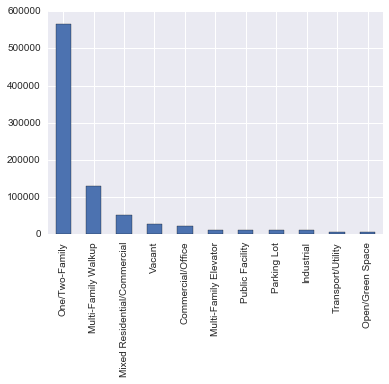

In [81]:
land_use_data.plot(kind='bar')

*Break this down by value and building area too!*

# Easements

The most curious case, trying to find that one with the most easements.

In [82]:
easements = pluto['Easements'].value_counts().drop('.')
easements.index = [int(float(s)) for s in easements.index]
easements = easements.groupby(easements.index).sum().sort_index()

In [83]:
easements

0     855595
1       3578
2        191
3         62
4         17
5          9
6          3
7          3
8          1
9          1
13         1
Name: Easements, dtype: int64

In [84]:
pluto[pluto['Easements'] == 13]

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
83901,Staten Island,1651.0,7502.0,501.0,303.01,1004.0,31.0,49.0,10303.0,E166,121.0,100.0,24 FARRAGUT AVENUE,R3-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R3-2,NaN,N,R3,2.0,13,NaN,REGALWALK HOMEOWNERS,27391.0,24602.0,0.0,24602.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,14.0,1.0,13.0,13.0,0.62,0.0,122.0,242.0,NaN,0.0,N,5.0,5.0,49543.0,182930.0,9880.0,9880.0,1988.0,NaN,0.0,0.0,NaN,NaN,0.9,0.6,0.0,1.0,5.0,5.016518e+09,104.0,30301.0,938281.0,165465.0,20d,NaN,500 000,50702.0,NaN,5.016510e+09,2/11/1989,1.0,15v1
